In [58]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import missingno as msno
import sweetviz as sv
import seaborn as sns
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df = df.drop(columns=['url', 'timedelta'])
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# EDA 1a.

## See the spread of the data

In [43]:
# report = sv.analyze(df)
# report.show_notebook()

## Check for missing values

In [44]:
# msno.bar(df)

Seems like there are no missing values!!

## Look at target variable `shares`

### No transformations

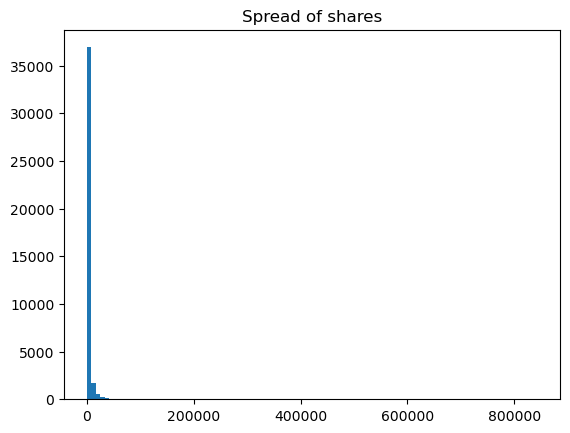

In [45]:
plt.hist(df['shares'], 100)
plt.title('Spread of shares')
plt.show()

## Standardize data

## Remove outliers greater than 3 standard deviations from the mean

In [46]:
standard = StandardScaler(with_std=True)

std_df = df.copy()

std_df['shares'] = standard.fit_transform(df[['shares']])

# Correct usage of .where
std_df['shares'] = std_df['shares'].where(std_df['shares'] <= 3, np.nan)
# Drop rows with NaN (optional)
std_df.dropna(subset=['shares'], inplace=True)

In [47]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [48]:
y = std_df[['shares']].to_numpy()

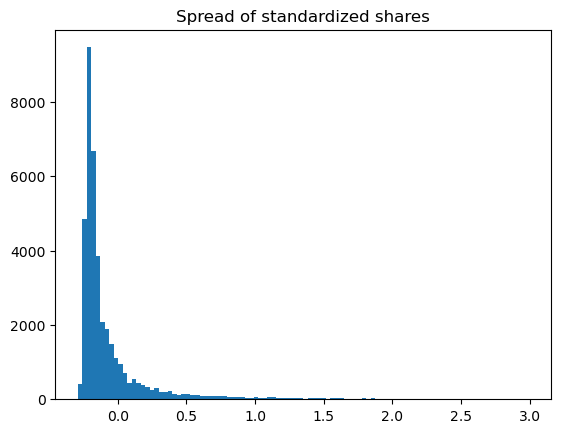

In [49]:
plt.hist(y, 100)
plt.title('Spread of standardized shares')
plt.show()

In [50]:
y = df['shares'].to_numpy()

## Normalize data

In [51]:
mean = y.mean()
y_normal = (y-mean) / mean

In [52]:
y_normal.sort()

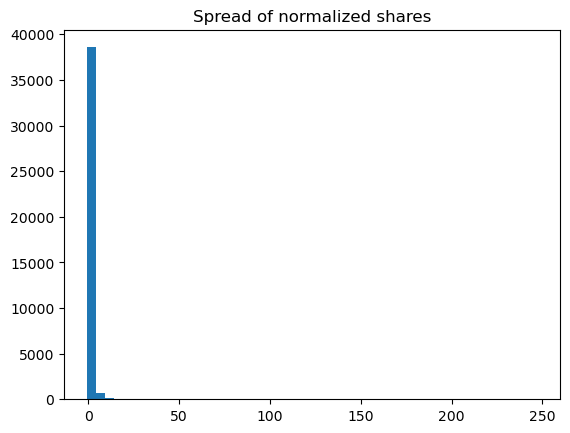

In [53]:
plt.hist(y_normal, 50)
plt.title('Spread of normalized shares')
plt.show()

## Log transform data

In [54]:
log_df = df.copy()

log_df['shares'] = np.log10(df['shares'])

In [55]:
log_df['shares'].describe()

count    39644.000000
mean         3.246288
std          0.404105
min          0.000000
25%          2.975891
50%          3.146128
75%          3.447158
max          5.925982
Name: shares, dtype: float64

In [56]:
y = log_df['shares']

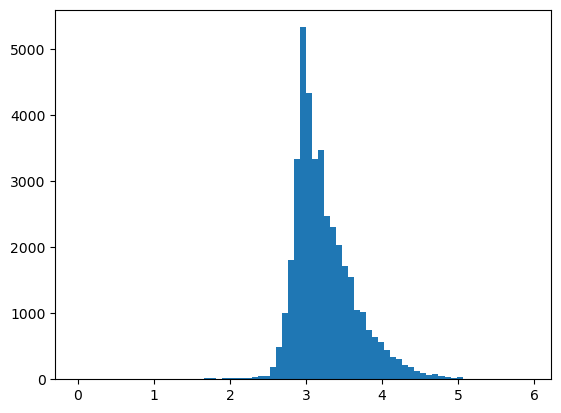

In [57]:
plt.hist(y, 75)
plt.show()

***Log base 10 transformations are the best transformation because of the close spread of the transformed data and most of the data are centered around 3 with a range of [0,6)***

# EDA 1.b

In [60]:
df['shares'] = log_df['shares']
train_df, test_df = train_test_split(df, random_state=0)

In [61]:
y_train = train_df['shares']
X_train = train_df.drop(columns='shares')
y_test= test_df['shares']
X_test = test_df.drop(columns='shares')

In [ ]:
# Use sklearn to get fast estimates and ols model to trim features and draw conclusions
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
feats = model.feature_names_in_
coef = model.coef_
